# <font color=purple> Suprise Housing <font>
<p>PROBLEM STATEMENT - A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


### Table of contents 
1. Data Understanding 
2. Data Cleaning 
3. Data Manipulation 
4. Data Analysis
5. Data Transformation
6. Model building and evaluation
5. Recommendations

## <font color=brown>1. Data Understanding<font>
### <font color=#0f3fd1 >1.1 Importing required libraries<font>

In [1]:
import numpy as np  #Scientific Computing Libraries
import pandas as pd  #Data Cleaning and Analysis Libraries 
import matplotlib.pyplot as plt #Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries

import sklearn #Scikit Library for evaluating requirement specific parameters and performing preprocessing steps
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score


# hide warnings
import warnings
warnings.filterwarnings('ignore')

import warnings   #ignore warnings from displaying on UI
warnings.filterwarnings('ignore')
%matplotlib inline

### <font color=#0f3fd1 >1.2 Load the Data<font>

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### <font color=#0f3fd1 >1.3 Data overview <font>

In [3]:
#Basic Data Overview
print ("Number of Rows : " ,df.shape[0])
print ("Number of Columns : " ,df.shape[1])
print ("Features : \n" ,df.columns.tolist())
print ("Data Types of column:\n",df.dtypes.value_counts())

Number of Rows :  1460
Number of Columns :  81
Features : 
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'Encl

In [4]:
print ("Number of Columns having all Null values:", len(df.columns[df.isnull().all()].tolist()))
print ("\nNumber of Missing values Count: ", df.isnull().sum().values.sum())
print ("\nSingle valued columns: \n",df.columns[df.nunique() == 1].tolist())

Number of Columns having all Null values: 0

Number of Missing values Count:  6965

Single valued columns: 
 []


In [5]:
#check missing percentage
percent_missing = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(15)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
dtype: float64

## <font color=brown>2. Data Cleaning <font>

In [6]:
# Dropping Columns with high missing values ,above 40%

df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

Among the columns listed above <br>
- LotFrontage, MasVnrArea and GarageYrBlt have missing values

In [7]:
 #Treaing missing values by imputing for columns with missing values less than or equal to 40%

df['LotFrontage']= df.LotFrontage.fillna(df.LotFrontage.median()) #Can see a presence of outlier so imputing the missing values through median
df['MasVnrArea']= df.MasVnrArea.fillna(df.MasVnrArea.median())    # Can see presence of outlier
df['GarageYrBlt']= df.GarageYrBlt.fillna(df.GarageYrBlt.mean())  # it looks stable with no outlier presence so we can use mean for imputation

From the calculations above we can see that some of the columns can be removed directly as 
they are not adding any variance to our data and hence are not at all useful.
- BsmtCond
- BsmtFinType2
- BsmtExposure
- GarageQual
- GarageYrBlt
- GarageCond
- MasVnrArea

In [8]:
df.drop(['BsmtCond','BsmtFinType2','BsmtExposure','GarageQual','GarageYrBlt','GarageCond','MasVnrArea'],axis=1,inplace = True)

In [9]:
#Inspecting data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
#Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## <font color=brown>4. Data Analysis<font>
### <font color=#0f3fd1 >4.1 Univariant Analysis and Bivariant Analysis<font>

<AxesSubplot:>

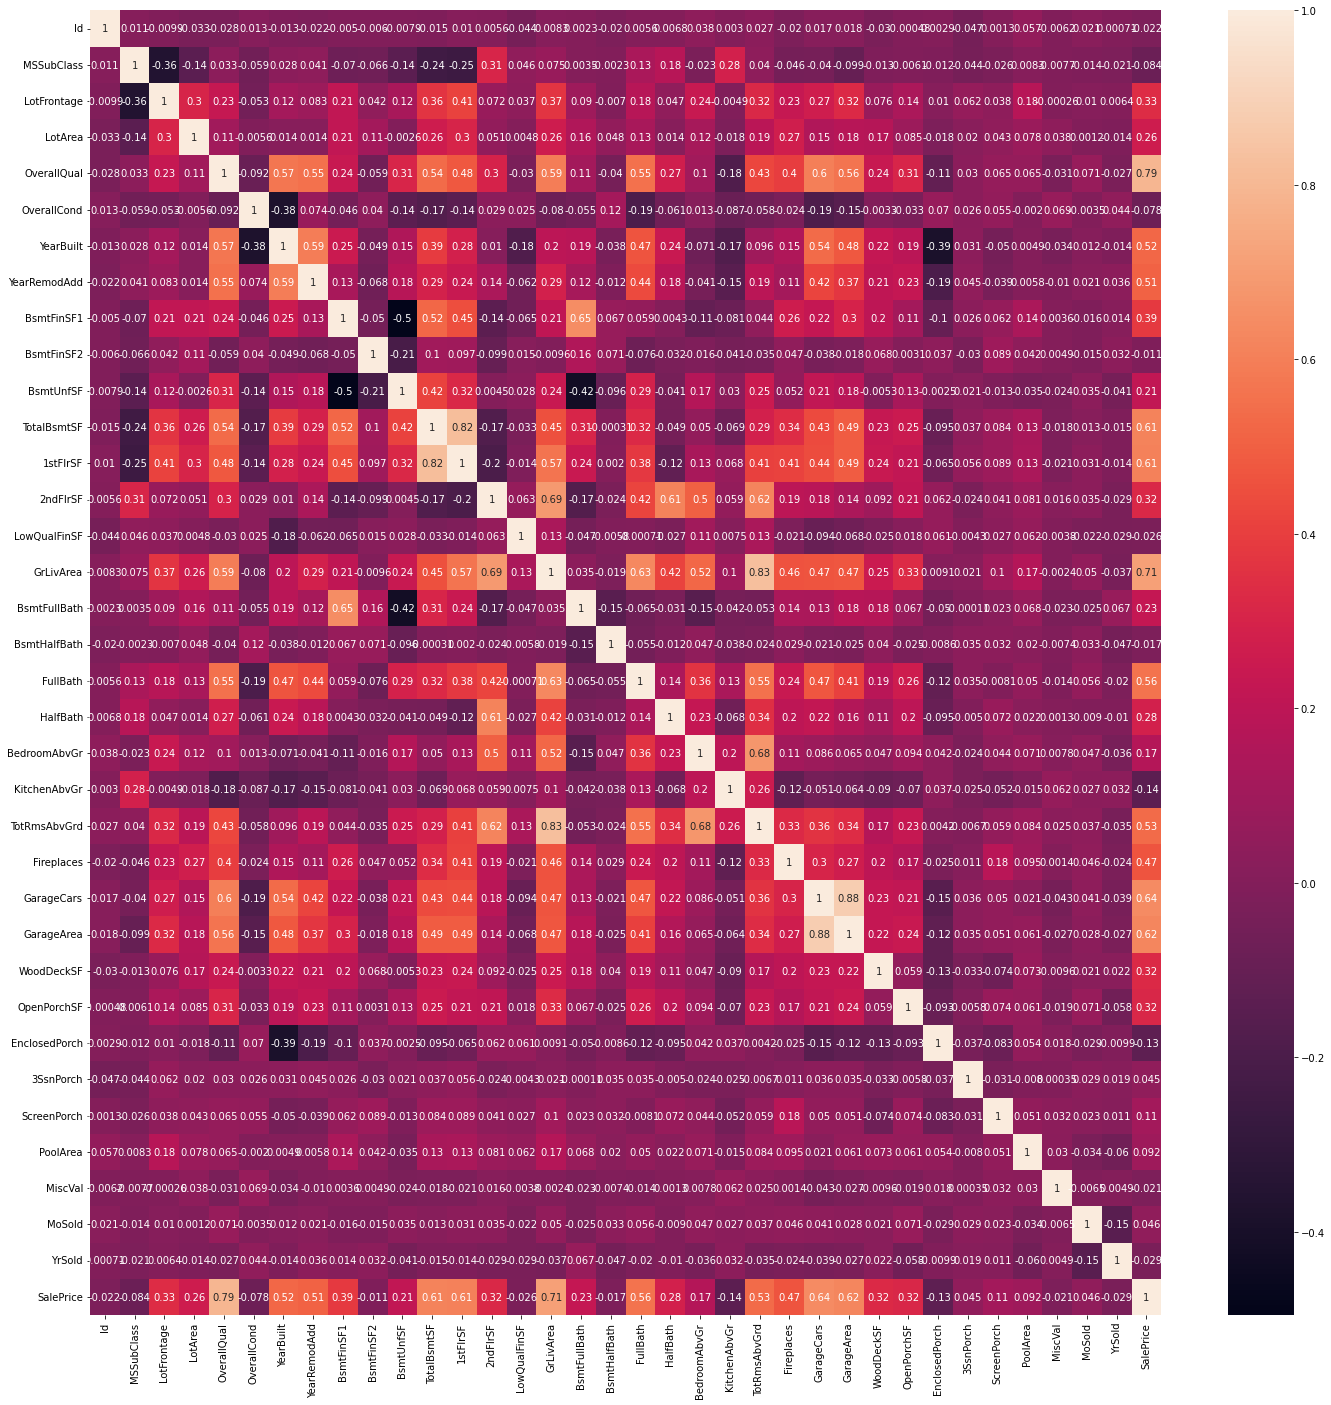

In [11]:
plt.figure(figsize=(24, 24))
sns.heatmap(df.corr(), annot = True)

In [12]:
#sns.pairplot(df[list(df.columns)])

In [13]:
#regenerating list of numerical and non-numerical columns
NonNumCols = []
NumCols = []

for col in list(df.columns):
    if df[col].dtypes == 'object':
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
print('Non-Numerical columns:\n',NonNumCols)

print('Numerical columns:\n',NumCols)

Non-Numerical columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns:
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [14]:
#Its time to get dummies for all other categorical variables
df_dummy = pd.get_dummies(df[NonNumCols], drop_first=True)

In [15]:
#Concating the dataframe with dummies with the the original dataframe (df_dropped)
df_concat = pd.concat([df, df_dummy], axis=1)
df_concat.shape

(1460, 246)

In [16]:
#Let's drop the original columns from where dummies are created
df_final = df_concat.drop(NonNumCols, axis = 1)
df_final.shape

(1460, 213)

## <font color=brown>6. Model building and evaluation <font>
### <font color=#0f3fd1 >6.1 Splitting data into train and test data<font>    

In [17]:
#Since we are predicting the count of the bike sharing target as in y in set to cnt
y=  df_final['SalePrice']

#All the remaining variable is considered as x
X= df_final.drop('SalePrice', axis=1)

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [18]:
# Checking shape and size for train and test
#Columns of the data should be same
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 212)
(438, 212)
(1022,)
(438,)


## Scaling

In [19]:
scaler = StandardScaler()

In [20]:
#Scaling the numerical columns
NumCols1 = NumCols.copy()
NumCols1.remove('SalePrice')
X_train[NumCols1] = scaler.fit_transform(X_train[NumCols1])
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-1.235594,-0.657427,-0.116296,-0.473943,-0.780717,0.383810,-1.525951,-1.695468,0.042644,-0.293157,...,0,0,0,0,1,0,0,0,1,0
318,-0.981223,0.035958,0.925887,-0.056819,0.649199,-0.532671,0.716352,0.390510,1.159589,-0.293157,...,0,0,0,0,1,0,0,0,1,0
239,-1.167290,-0.195170,-0.795980,-0.169353,-0.065759,-1.449151,-0.866450,-1.695468,-0.762245,-0.293157,...,0,0,0,0,1,0,0,0,1,0
986,0.592111,-0.195170,-0.478794,-0.502489,-0.065759,2.216770,-2.020577,0.875621,-0.964543,-0.293157,...,0,0,0,0,1,0,0,0,1,0
1416,1.604886,3.040630,-0.433482,0.082999,-1.495676,0.383810,-2.844953,-1.695468,-0.964543,-0.293157,...,0,0,0,0,1,0,0,0,1,0


In [21]:
X_test[NumCols1] = scaler.transform(X_test[NumCols1])
X_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,1.651992,-0.888556,-0.433482,-0.144205,-1.495676,0.383810,-0.009099,-0.676735,0.361157,-0.293157,...,0,0,0,0,1,0,0,0,1,0
57,-1.595953,0.035958,0.880575,0.112613,0.649199,-0.532671,1.079078,0.924132,-0.964543,-0.293157,...,0,0,0,0,1,0,0,0,1,0
780,0.106921,-0.888556,-0.297545,-0.253438,0.649199,-0.532671,0.782302,0.536043,-0.964543,-0.293157,...,0,0,0,0,1,0,0,0,1,0
382,-0.830484,0.035958,0.427452,-0.120417,0.649199,-0.532671,1.145028,1.021154,-0.964543,-0.293157,...,0,0,0,0,1,0,0,0,1,0
1170,1.025485,0.498215,0.291515,-0.058761,-0.065759,0.383810,0.188752,-0.385668,0.158858,-0.293157,...,0,0,0,0,1,0,0,0,1,0


### <font color=#0f3fd1 >6.2 Build model using Ridge Regression<font> 

In [22]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [23]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.030451,0.014618,0.007373,0.000493,0.0001,{'alpha': 0.0001},-17063.046097,-20391.311268,-21224.697876,-20865.652584,...,-19553.106695,1624.497169,15,-12321.599566,-11946.512957,-12420.305366,-12726.320865,-12129.637240,-12308.875199,264.677961
1,0.026979,0.001664,0.008361,0.000497,0.001,{'alpha': 0.001},-17048.593434,-20385.261066,-21172.143666,-20773.991417,...,-19513.102032,1608.676333,13,-12326.311642,-11945.826765,-12413.672203,-12723.655453,-12137.879389,-12309.469090,262.438972
2,0.025419,0.001067,0.007782,0.000441,0.01,{'alpha': 0.01},-16996.052799,-20329.467039,-20910.390934,-20092.336475,...,-19269.986222,1497.913158,11,-12482.416771,-11943.258640,-12482.092511,-12802.923046,-12310.810322,-12404.300258,280.126291
3,0.024900,0.002326,0.007468,0.000477,0.05,{'alpha': 0.05},-18072.169064,-20168.594510,-21117.262931,-19298.316228,...,-19517.484456,1045.378160,14,-13456.030791,-11964.122546,-13222.392254,-13418.325015,-13274.176355,-13067.009392,558.243978
4,0.022570,0.001226,0.007480,0.001414,0.1,{'alpha': 0.1},-18856.139686,-20083.264942,-21461.705693,-19232.537036,...,-19851.589073,902.436189,17,-14125.413726,-12001.315154,-13815.928338,-13989.430449,-13941.483876,-13574.714309,792.912145


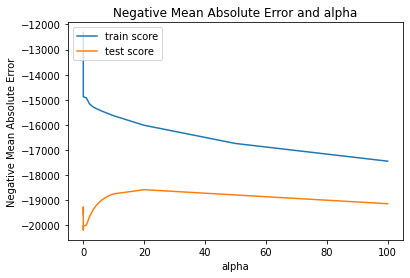

In [24]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [25]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.95581660e+02, -6.07129988e+03, -2.22056597e+03,  4.39679854e+03,
        1.66748839e+04,  5.26147129e+03,  5.79565325e+03,  2.02485645e+03,
        1.66957650e+03,  9.13309919e+02,  1.91248292e+03,  3.90045431e+03,
        5.35497007e+03,  1.51061098e+04, -1.25318097e+03,  1.62550028e+04,
        5.57076113e+03,  9.72280015e+02,  3.43517793e+03,  7.04576993e+02,
       -1.76176771e+03, -3.61894982e+03,  6.70028312e+02,  2.85393130e+03,
        1.05963708e+04, -2.02148241e+03,  2.42193628e+03, -1.18834500e+03,
        5.96676073e+02,  1.33212390e+03,  1.29595292e+03, -1.11344542e+03,
       -1.23531891e+02, -9.48967101e+02, -1.44442844e+03,  4.26151840e+03,
        3.16903449e+03,  4.67804583e+03, -5.37475245e+02,  7.15568013e+03,
        1.17209239e+03, -1.22305648e+04, -2.53055541e+02,  1.35432629e+04,
        1.08013420e+04,  1.28855123e+04, -3.85494961e+03,  8.17449905e+03,
       -7.52992077e+03, -2.39063662e+03, -1.10130019e+03,  9.74294174e+03,
        6.56141634e+02, -

### <font color=#0f3fd1 >6.3 Build model using Lasso Regression<font>  

In [26]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [27]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.554254,0.037021,0.007615,0.000778,0.0001,{'alpha': 0.0001},-17064.651416,-20519.373453,-21248.052284,-20731.879206,...,-19569.160729,1612.652358,27,-12321.607998,-11945.898089,-12421.375130,-12726.869286,-12128.437856,-12308.837672,265.272474
1,0.570878,0.033885,0.008057,0.001062,0.001,{'alpha': 0.001},-17064.578075,-20518.873556,-21248.846102,-20732.638794,...,-19569.074987,1613.116119,26,-12321.603202,-11945.889499,-12421.371123,-12726.858536,-12128.452895,-12308.835051,265.269004
2,0.562542,0.024688,0.008045,0.000901,0.01,{'alpha': 0.01},-17063.689973,-20513.878559,-21255.374511,-20735.299369,...,-19568.076066,1615.879576,25,-12321.683001,-11945.838843,-12421.349349,-12726.782626,-12128.652376,-12308.861239,265.230749
3,0.521738,0.021365,0.007675,0.000571,0.05,{'alpha': 0.05},-17059.725902,-20497.133097,-21248.540140,-20721.521189,...,-19556.858252,1614.105413,24,-12322.042623,-11945.646455,-12421.261102,-12726.466385,-12129.541749,-12308.991663,265.059205
4,0.568778,0.023902,0.008503,0.001256,0.1,{'alpha': 0.1},-17054.770790,-20484.130616,-21241.225764,-20706.760172,...,-19546.990832,1611.961057,23,-12322.492229,-11945.406106,-12421.150035,-12726.260841,-12130.654642,-12309.192770,264.905146


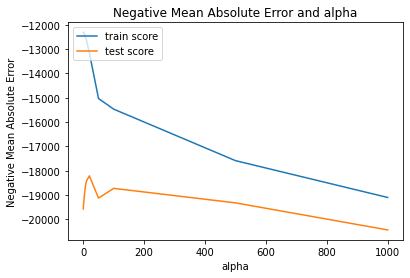

In [28]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [29]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [30]:
lasso.coef_

array([-1.89076471e+02, -4.02869599e+03, -1.60224922e+03,  4.42914891e+03,
        1.54016001e+04,  5.41032536e+03,  6.31562893e+03,  2.37336810e+03,
        0.00000000e+00,  3.01940840e+01, -0.00000000e+00,  6.34553023e+03,
        0.00000000e+00,  7.32445986e+03, -2.05705472e+03,  2.50485887e+04,
        5.62137833e+03,  9.55864543e+02,  3.28307185e+03,  1.23709514e+02,
       -1.79281183e+03, -3.99388743e+03, -0.00000000e+00,  2.13375957e+03,
        9.63787053e+03, -2.39088844e+03,  1.98221388e+03, -4.95508828e+02,
        3.07534723e+02,  9.75783177e+02,  1.18816200e+03, -1.54872483e+03,
       -2.97450581e+01, -7.47540966e+02, -1.25999288e+03,  0.00000000e+00,
        0.00000000e+00,  4.37420527e+03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.97801922e+04,  0.00000000e+00,  1.31273125e+04,
        1.34913415e+04,  1.08189121e+04, -0.00000000e+00,  8.62489852e+03,
       -4.67365638e+03, -0.00000000e+00,  0.00000000e+00,  6.47398188e+03,
        0.00000000e+00, -

In [31]:
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)
#y_pred_ridge_test = ridge.predict(X_test)

Error distribution in train dataset


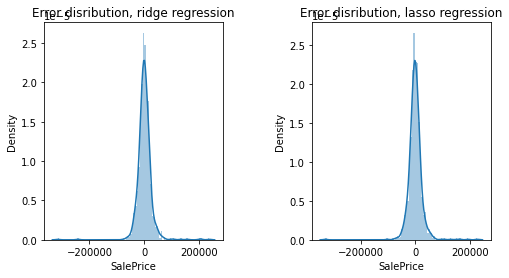

In [32]:
print('Error distribution in train dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [33]:
print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(y_train, y_pred_ridge_train))
print('r2_score for lasso:', r2_score(y_train, y_pred_lasso_train))

r2_score in train dataset
r2_score for ridge: 0.8862561055170514
r2_score for lasso: 0.8953474937802598


In [34]:
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

Error distribution in test dataset


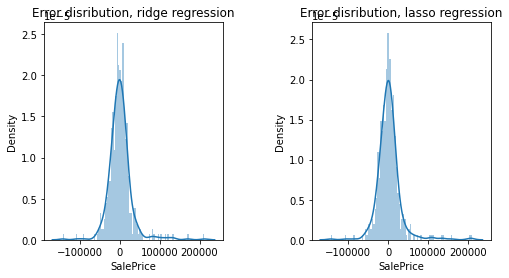

In [35]:
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [36]:
print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))

print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in train dataset:
r2_score for ridge: 0.89
r2_score for lasso: 0.9
r2_score in test dataset:
r2_score for ridge: 0.86
r2_score for lasso: 0.86


In [37]:
#lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff

[('constant', 185196.462),
 ('Id', -189.076),
 ('MSSubClass', -4028.696),
 ('LotFrontage', -1602.249),
 ('LotArea', 4429.149),
 ('OverallQual', 15401.6),
 ('OverallCond', 5410.325),
 ('YearBuilt', 6315.629),
 ('YearRemodAdd', 2373.368),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 30.194),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 6345.53),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 7324.46),
 ('LowQualFinSF', -2057.055),
 ('GrLivArea', 25048.589),
 ('BsmtFullBath', 5621.378),
 ('BsmtHalfBath', 955.865),
 ('FullBath', 3283.072),
 ('HalfBath', 123.71),
 ('BedroomAbvGr', -1792.812),
 ('KitchenAbvGr', -3993.887),
 ('TotRmsAbvGrd', -0.0),
 ('Fireplaces', 2133.76),
 ('GarageCars', 9637.871),
 ('GarageArea', -2390.888),
 ('WoodDeckSF', 1982.214),
 ('OpenPorchSF', -495.509),
 ('EnclosedPorch', 307.535),
 ('3SsnPorch', 975.783),
 ('ScreenPorch', 1188.162),
 ('PoolArea', -1548.725),
 ('MiscVal', -29.745),
 ('MoSold', -747.541),
 ('YrSold', -1259.993),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL',

In [38]:
#Features (including dummies) along with their coefficients
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
var_coeff

[('constant', 185196.462),
 ('Id', -189.076),
 ('MSSubClass', -4028.696),
 ('LotFrontage', -1602.249),
 ('LotArea', 4429.149),
 ('OverallQual', 15401.6),
 ('OverallCond', 5410.325),
 ('YearBuilt', 6315.629),
 ('YearRemodAdd', 2373.368),
 ('BsmtFinSF2', 30.194),
 ('TotalBsmtSF', 6345.53),
 ('2ndFlrSF', 7324.46),
 ('LowQualFinSF', -2057.055),
 ('GrLivArea', 25048.589),
 ('BsmtFullBath', 5621.378),
 ('BsmtHalfBath', 955.865),
 ('FullBath', 3283.072),
 ('HalfBath', 123.71),
 ('BedroomAbvGr', -1792.812),
 ('KitchenAbvGr', -3993.887),
 ('Fireplaces', 2133.76),
 ('GarageCars', 9637.871),
 ('GarageArea', -2390.888),
 ('WoodDeckSF', 1982.214),
 ('OpenPorchSF', -495.509),
 ('EnclosedPorch', 307.535),
 ('3SsnPorch', 975.783),
 ('ScreenPorch', 1188.162),
 ('PoolArea', -1548.725),
 ('MiscVal', -29.745),
 ('MoSold', -747.541),
 ('YrSold', -1259.993),
 ('MSZoning_RL', 4374.205),
 ('LotShape_IR3', -19780.192),
 ('LandContour_HLS', 13127.312),
 ('LandContour_Low', 13491.341),
 ('LandContour_Lvl', 10818

In [39]:
#length of the var_coeff
len(var_coeff)

103

In [41]:
#Identifying important features, excluding dummies
final_var_list = []
for i in list(df):
    for j in var_coeff:
        if i in j[0]:
            final_var_list.append(i)
            break
print(final_var_list)
print(len(final_var_list))

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtFinType1', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
59


In [42]:
#variables with positive coefficients
pos_var = [x for x in var_coeff if x[-1] > 0]
final_var_pos = []
for i in list(df):
    for j in pos_var:
        if i in j[0]:
            final_var_pos.append(i)
            break
print(final_var_pos)
print(len(final_var_pos))

['MSZoning', 'LotArea', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinSF2', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Functional', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'SaleType', 'SaleCondition']
35


In [43]:
#variables with negative coefficients
neg_var = [x for x in var_coeff if x[-1] < 0]
final_var_neg = []
for i in list(df):
    for j in neg_var:
        if i in j[0]:
            final_var_neg.append(i)
            break
print(final_var_neg)
print(len(final_var_neg))

['Id', 'MSSubClass', 'LotFrontage', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtFinType1', 'Heating', 'HeatingQC', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageArea', 'OpenPorchSF', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
32


## <font color=brown>7. Conclusion<font>
Optimum value for lambda in ridge regression is 10
Optimum value for lambda in lasso regression is 100
So, the company can purchase houses below the market value by highlighting the negative parameters.
Afterwards, the company can work little bit on the negative parameters to decrease the magnitude of negative weight and sell the houses by mainly highlighting the positive features.
r2_score in train dataset: r2_score for ridge: 0.89, r2_score for lasso: 0.9
r2_score in test dataset: r2_score for ridge: 0.87, r2_score for lasso: 0.87